# Project 2: Ames Housing Data - Cleaning

## Problem Statement:

**According to the Ames, Iowa housing data, which regression model can most accurately predict a house's price? As a result, why should millenials choose to live in Ames based on the most important housing features determined by the optimal regression model?** 

[The Ames Iowa Housing Data](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) contains 81 housing variables that were used in computing assessed values for individual residential properties sold from 2006 to 2010. I will be using various regression models, such as Linear Regression, LassoCV, and RidgeCV, to determine which model most accurately fits the data by comparing RMSE and $R^2$ scores.

Furthermore, I believe Ames is a prime location for millenials based on the regression coefficients as well as many other factors.

![info](../images/trulia.png)
[(Source: Trulia)](https://www.trulia.com/real_estate/Ames-Iowa/)

[According to Trulia](https://www.trulia.com/real_estate/Ames-Iowa/), Ames Real Estate Market Overview states the following: the median homeowner is 31, around 44% of individuals are single, the median household income is around \\$56,000, and 67\% are college educated.

[Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa) also mentions how Ames had a population of 66,498 in 2017, and Iowa State University is home to 36,321 students (Fall 2017), which make up approximately one half of the city's population. Based on the demographics and cheaper than the [mean](https://www.zillow.com/home-values/) (\\$226,300) housing prices, Ames is a location where millenials should settle down in while also taking advantage of the housing market.


## Data Dictionary:

Please click the [following](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) for the Data Dictionary.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm
from IPython.display import Image
from IPython.core.display import HTML 

DO = '#7D1B7E' #for color
np.random.seed(3_0_0)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## Data Exploratory Analysis:

In [2]:
train_df = pd.read_csv('../datasets/train.csv')

In [3]:
train_df.shape

(2051, 81)

The dataset contains 80 variables and 1 target variable, which is the sales price of a house denoted as "SalesPrice". One of the issues with the dataset is the collinearity between a several independent variables.

In [4]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


The column names should not have spaces in them, so as a pythonista, I am going to replace the spaces with underscores.

In [5]:
train_df.columns = [name.replace(' ','_') for name in train_df.columns]

At a glance, the first two variables, Id and PID, both appear to be unique identifiers for each house, so I will check if they are in fact unique. The PID is for parcel review, so I will remove this column. Identifier columns have no effect on the SalesPrice.

In [6]:
print(train_df['SalePrice'].corr(train_df['PID']))
print(train_df['SalePrice'].corr(train_df['Id']))

-0.2550518985277239
-0.051397849884676196


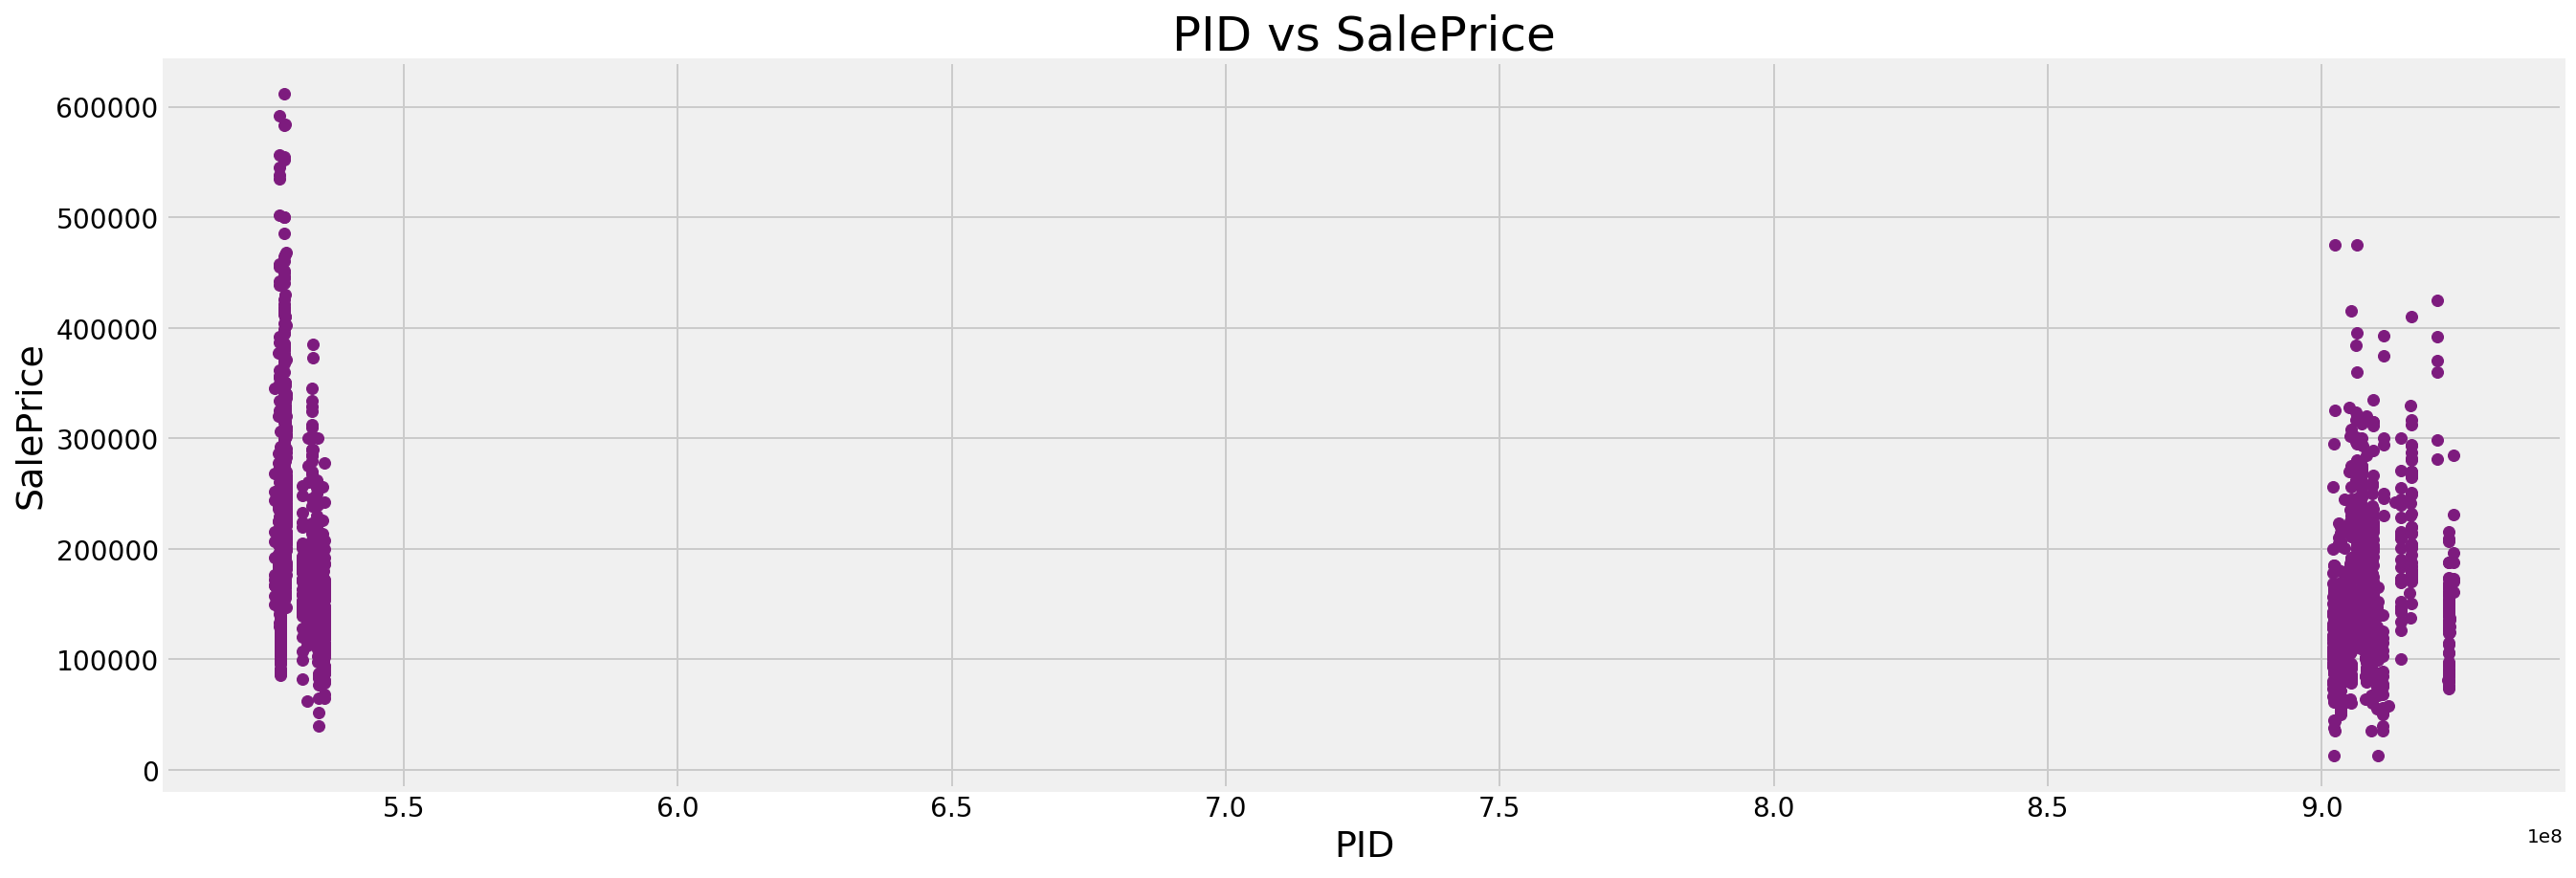

In [7]:
plt.figure(figsize=(20,7))
plt.scatter(train_df['PID'], train_df['SalePrice'], c = DO);

plt.title('PID vs SalePrice', fontsize = 25);
plt.ylabel('SalePrice', fontsize = 19);
plt.xlabel('PID', fontsize = 19);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

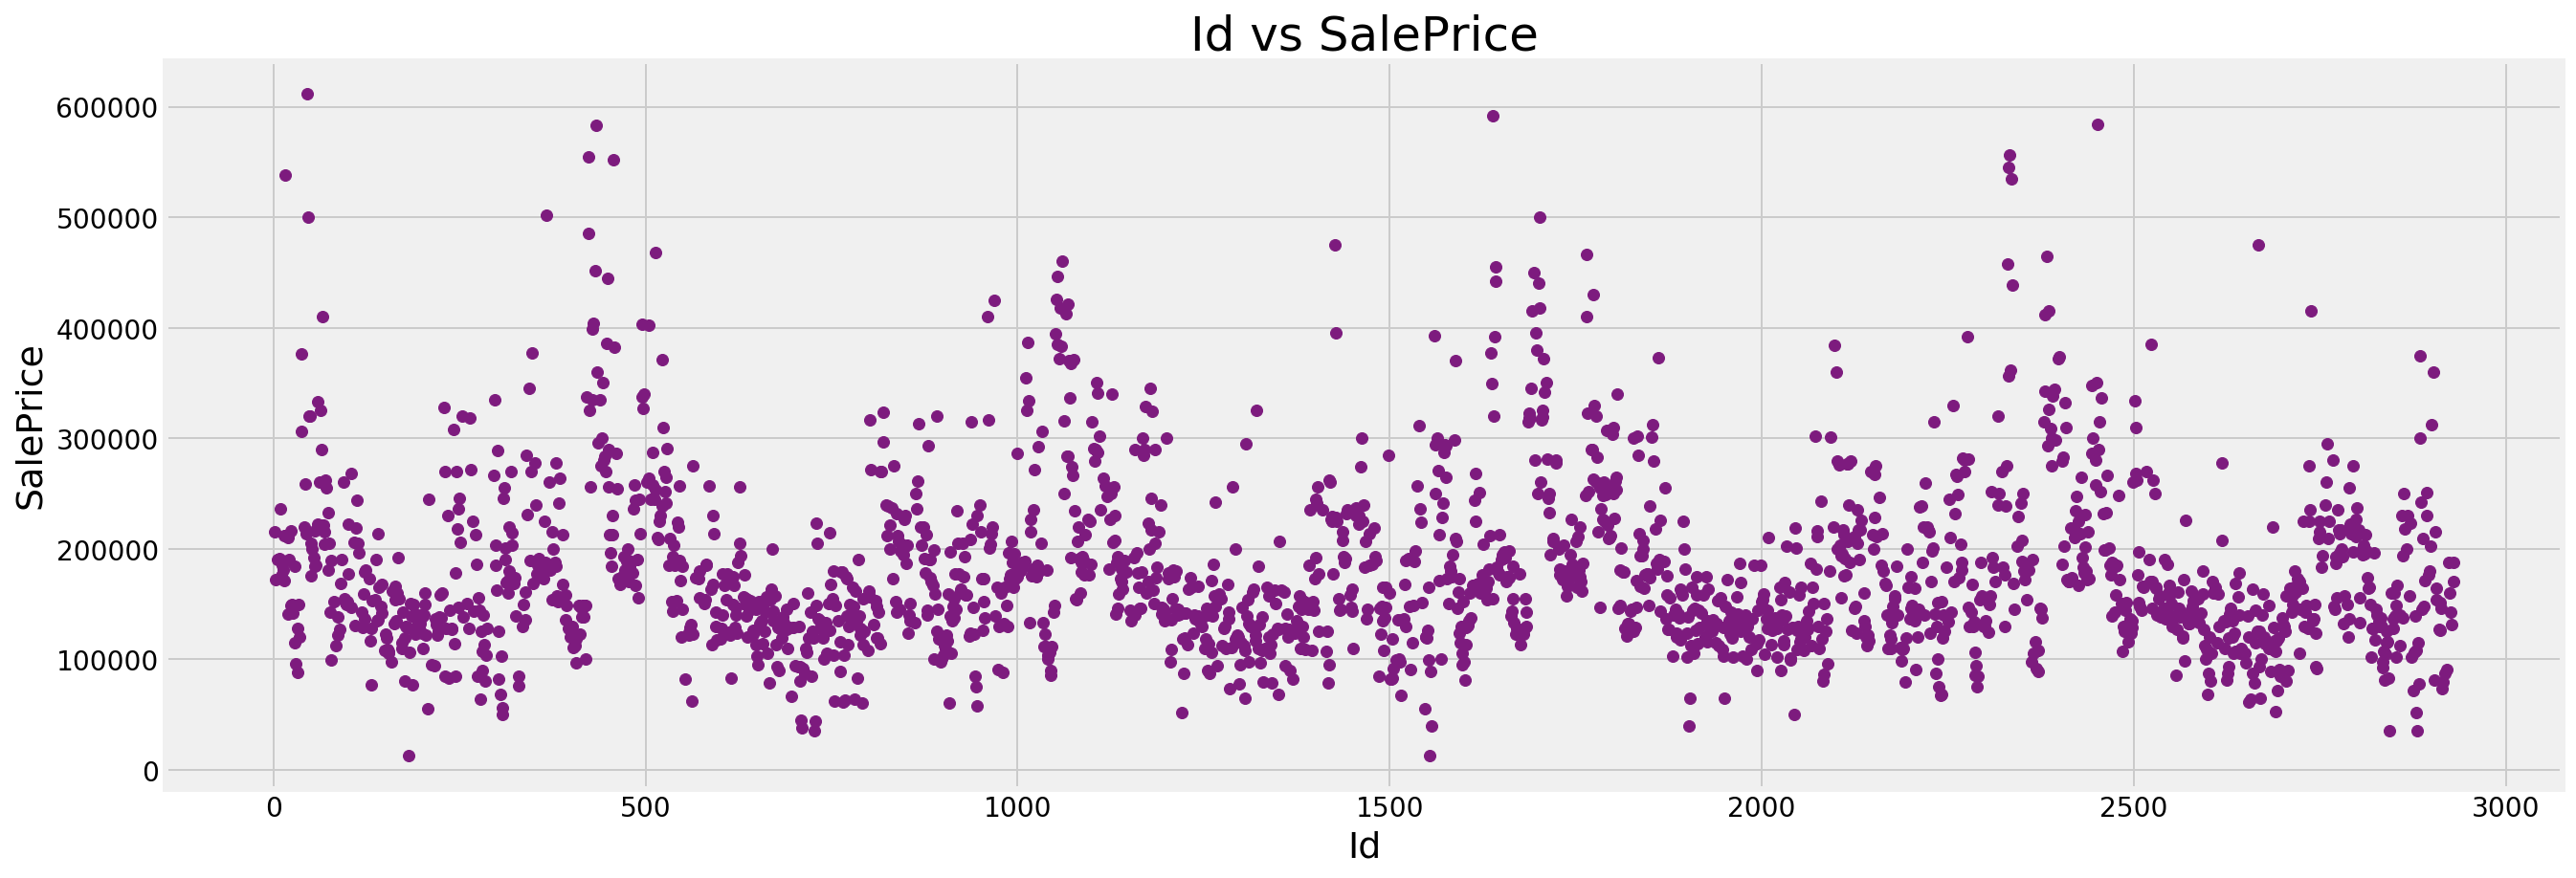

In [8]:
plt.figure(figsize=(20,7))
plt.scatter(train_df['Id'], train_df['SalePrice'], c = DO);

plt.title('Id vs SalePrice', fontsize = 25);
plt.ylabel('SalePrice', fontsize = 19);
plt.xlabel('Id', fontsize = 19);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

In [9]:
print(train_df['Id'].value_counts().sum())
print(train_df['PID'].value_counts().sum())

2051
2051


The correlation between the SalePrice and PID is -0.25, and the correlation between Saleprice and Id is -0.05. And there are 2051 unique identification numbers for each of the columns. I will drop the columns.

In [10]:
train_df.drop(['PID','Id'], axis = 1, inplace=True)

In [11]:
train_df.dtypes.sort_values().value_counts()

object     42
int64      26
float64    11
dtype: int64

There are 42 object variables, which presumably have string type values, 26 integer variables, which may be ordinal or categorical, and 11 float variables, which are continuous.

In [12]:
train_df.columns.sort_values()

Index(['1st_Flr_SF', '2nd_Flr_SF', '3Ssn_Porch', 'Alley', 'Bedroom_AbvGr',
       'Bldg_Type', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'BsmtFin_Type_1',
       'BsmtFin_Type_2', 'Bsmt_Cond', 'Bsmt_Exposure', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Bsmt_Qual', 'Bsmt_Unf_SF', 'Central_Air',
       'Condition_1', 'Condition_2', 'Electrical', 'Enclosed_Porch',
       'Exter_Cond', 'Exter_Qual', 'Exterior_1st', 'Exterior_2nd', 'Fence',
       'Fireplace_Qu', 'Fireplaces', 'Foundation', 'Full_Bath', 'Functional',
       'Garage_Area', 'Garage_Cars', 'Garage_Cond', 'Garage_Finish',
       'Garage_Qual', 'Garage_Type', 'Garage_Yr_Blt', 'Gr_Liv_Area',
       'Half_Bath', 'Heating', 'Heating_QC', 'House_Style', 'Kitchen_AbvGr',
       'Kitchen_Qual', 'Land_Contour', 'Land_Slope', 'Lot_Area', 'Lot_Config',
       'Lot_Frontage', 'Lot_Shape', 'Low_Qual_Fin_SF', 'MS_SubClass',
       'MS_Zoning', 'Mas_Vnr_Area', 'Mas_Vnr_Type', 'Misc_Feature', 'Misc_Val',
       'Mo_Sold', 'Neighborhood', 'Open_Porch_S

There might be an issue with collinearity between a few predictor variables due to some varibles providing information about the same aspect of the house.<br><br>
For example:

- Basement Variables:
    - Bsmt Cond, Bsmt Exposure, Bsmt Full Bath, Bsmt Half Bath, Bsmt Qual, Bsmt Unf SF, BsmtFin SF 1, BsmtFin SF 2, BsmtFin Type 1, BsmtFin Type 2
    
    
- Garage Variables:
    - Garage Area, Garage Cars, Garage Cond, Garage Finish, Garage Qual, Garage Type, Garage Yr Blt
    
    
- Square Feet Variables:
    - 1st Flr SF, 2nd Flr SF, Bsmt Unf SF, BsmtFin SF 1, BsmtFin SF 2, Low Qual Fin SF, Open Porch SF, Total Bsmt SF, Wood Deck SF


## Removing Null Values

I am now going to look for any null values in each column which is a predictor variable, and decide whether to drop the values or impute the nulls as 0's,the median, or the mean.

The function, null_checker(), prints predictor variables and their number of null values and creates a null_mask dictionary that has null masks for predictor variables. 

In [13]:
def null_checker():
    null_vals = train_df.isnull().sum().sort_values(ascending=False)
    
    null_in_col=[]
    null_dict = {}
    for pos in range(len(null_vals)):
        if null_vals[pos] > 0:
            name = null_vals.index[pos]
            print(f'{name}: {null_vals[pos]}')
            null_in_col.append(null_vals.index[pos])
            null_dict[null_vals.index[pos]+'_mask'] = train_df[null_vals.index[pos]].isnull()
    
    if len(null_in_col) > 1:
        print(f'\nThere are {len(null_in_col)} predictor variables with null values.')
    elif len(null_in_col) == 1:
        print(f'\nThere is {len(null_in_col)} predictor variable with null values.')
    elif len(null_in_col) == 0:
        print('There are no null values in your dataset. Hooray!')
        
    return null_dict

In [14]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911
Fence: 1651
Fireplace_Qu: 1000
Lot_Frontage: 330
Garage_Qual: 114
Garage_Cond: 114
Garage_Yr_Blt: 114
Garage_Finish: 114
Garage_Type: 113
Bsmt_Exposure: 58
BsmtFin_Type_2: 56
Bsmt_Qual: 55
BsmtFin_Type_1: 55
Bsmt_Cond: 55
Mas_Vnr_Type: 22
Mas_Vnr_Area: 22
Bsmt_Half_Bath: 2
Bsmt_Full_Bath: 2
Bsmt_Unf_SF: 1
Total_Bsmt_SF: 1
BsmtFin_SF_1: 1
BsmtFin_SF_2: 1
Garage_Cars: 1
Garage_Area: 1

There are 26 predictor variables with null values.


Starting with the predictor variable that has the lowest number of null values, I will examine each variable's null values and determine how to deal with them.

**Removing Garage Nulls**

In [15]:
garage_cols = list(train_df.iloc[:,train_df.columns.str.contains('Garage')].columns)

In [16]:
train_df[null_mask['Garage_Area_mask']][garage_cols]

,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train_df[null_mask['Garage_Cars_mask']][garage_cols]

,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


House 1712 has null values for two continuous variables, Garage Area and Garage Cars. Based on the data dictionary, null values for Garage Cond, Garage Qual, and Garage Finish, incidicate that a house does not have a garage.

As a result, I'm going to replace both Garage Area and Garage Cars values to 0 because House 1712 does not have a garage. Furthermore, the Garage Type should not be 'Detchd' because it doesn't exist. The value will be replaced as a null value for now. 

In [18]:
train_df.at[1712, 'Garage_Area'] = 0
train_df.at[1712, 'Garage_Cars'] = 0
train_df.at[1712, 'Garage_Type'] = None

**Removing Basement Nulls**

In [19]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911
Fence: 1651
Fireplace_Qu: 1000
Lot_Frontage: 330
Garage_Cond: 114
Garage_Qual: 114
Garage_Type: 114
Garage_Yr_Blt: 114
Garage_Finish: 114
Bsmt_Exposure: 58
BsmtFin_Type_2: 56
Bsmt_Qual: 55
Bsmt_Cond: 55
BsmtFin_Type_1: 55
Mas_Vnr_Area: 22
Mas_Vnr_Type: 22
Bsmt_Half_Bath: 2
Bsmt_Full_Bath: 2
Total_Bsmt_SF: 1
Bsmt_Unf_SF: 1
BsmtFin_SF_2: 1
BsmtFin_SF_1: 1

There are 24 predictor variables with null values.


In [20]:
basement_cols = list(train_df.iloc[:,train_df.columns.str.contains('Bsmt')].columns)

In [21]:
single_basement_nulls_mask = null_mask['BsmtFin_SF_1_mask'] & null_mask['BsmtFin_SF_2_mask'] &null_mask['Bsmt_Unf_SF_mask'] &null_mask['Total_Bsmt_SF_mask']
train_df[single_basement_nulls_mask][basement_cols]


,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Bsmt_Full_Bath,Bsmt_Half_Bath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
basement_float_list = list(train_df[basement_cols].select_dtypes(float).columns)
basement_float_list

['BsmtFin_SF_1',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath']

House 1327 has null values for all basement related variables, which means that there is no basement. Thus, I will replace all basement float variables to 0. 

In [23]:
for float_variable in basement_float_list:
    train_df.at[1327,float_variable] = 0

In [24]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911
Fence: 1651
Fireplace_Qu: 1000
Lot_Frontage: 330
Garage_Cond: 114
Garage_Type: 114
Garage_Yr_Blt: 114
Garage_Finish: 114
Garage_Qual: 114
Bsmt_Exposure: 58
BsmtFin_Type_2: 56
Bsmt_Cond: 55
Bsmt_Qual: 55
BsmtFin_Type_1: 55
Mas_Vnr_Area: 22
Mas_Vnr_Type: 22
Bsmt_Full_Bath: 1
Bsmt_Half_Bath: 1

There are 20 predictor variables with null values.


In [25]:
train_df[null_mask['Bsmt_Half_Bath_mask'] & null_mask['Bsmt_Full_Bath_mask']][basement_cols]

,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Bsmt_Full_Bath,Bsmt_Half_Bath
616,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


House 616 has null values for all basement related variables, which means that there is no basement. Thus, I will replace all basement float variables to 0. 

In [26]:
for float_variable in basement_float_list:
    train_df.at[616,float_variable] = 0

In [27]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911
Fence: 1651
Fireplace_Qu: 1000
Lot_Frontage: 330
Garage_Type: 114
Garage_Finish: 114
Garage_Qual: 114
Garage_Cond: 114
Garage_Yr_Blt: 114
Bsmt_Exposure: 58
BsmtFin_Type_2: 56
Bsmt_Cond: 55
BsmtFin_Type_1: 55
Bsmt_Qual: 55
Mas_Vnr_Area: 22
Mas_Vnr_Type: 22

There are 18 predictor variables with null values.


I am now going to look at ordinal basement variables that have null values.

In [28]:
ordinal_basement_nulls_mask = null_mask['Bsmt_Exposure_mask'] & null_mask['BsmtFin_Type_2_mask'] &null_mask['Bsmt_Cond_mask'] &null_mask['BsmtFin_Type_1_mask'] & null_mask['Bsmt_Qual_mask']


In [29]:
train_df[ordinal_basement_nulls_mask][basement_cols].head()

,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Bsmt_Full_Bath,Bsmt_Half_Bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [30]:
len(train_df[ordinal_basement_nulls_mask][basement_cols])

55

There are 55 houses that have 0's or null values for all basement related variables. As a result, I will replace all ordinal null variables to 'NA' to match the data dictionary's way of marking houses that have no basements.

In [31]:
basement_ordinal_list = list(train_df[basement_cols].select_dtypes(object).columns)
basement_ordinal_list

['Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2']

In [32]:
for house in train_df[ordinal_basement_nulls_mask][basement_cols].index:
    for ordinal_variable in basement_ordinal_list:
        train_df.at[house,ordinal_variable] = 'NA'

In [33]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911
Fence: 1651
Fireplace_Qu: 1000
Lot_Frontage: 330
Garage_Finish: 114
Garage_Type: 114
Garage_Yr_Blt: 114
Garage_Cond: 114
Garage_Qual: 114
Mas_Vnr_Area: 22
Mas_Vnr_Type: 22
Bsmt_Exposure: 3
BsmtFin_Type_2: 1

There are 15 predictor variables with null values.


In [34]:
train_df[null_mask['BsmtFin_Type_2_mask']][basement_cols]

,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Bsmt_Full_Bath,Bsmt_Half_Bath
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


There is a bit of an issue because house 1147 has a Type 2 finished basement of 479 square feet, but it is not possible to indicate what the Basement Finish type 2 rating should be. It appears that there are several rating options for BsmtFin_Type_2:

In [35]:
train_df['BsmtFin_Type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
NA       55
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin_Type_2, dtype: int64

I will impute the mean, which is ALQ (Average Living Quarters) for house 1147.

In [36]:
train_df.at[1147,'BsmtFin_Type_2'] = 'ALQ'

In [37]:
train_df[null_mask['Bsmt_Exposure_mask']][basement_cols]

,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Bsmt_Full_Bath,Bsmt_Half_Bath
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


For all three houses, their total unfinished square footage equals their total basement square footage. The options for Basement Exposure are:

In [38]:
train_df['Bsmt_Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
NA      55
Name: Bsmt_Exposure, dtype: int64

I will replace the null Bsmt_Exposure values to 'No', which stands for 'no exposure' as the basements exist but have not been finished yet.

In [39]:
for house in train_df[null_mask['Bsmt_Exposure_mask']][basement_cols].index:
    train_df.at[house,'Bsmt_Exposure'] = 'No'

**Removing Masonry Veneer Nulls**

In [40]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911
Fence: 1651
Fireplace_Qu: 1000
Lot_Frontage: 330
Garage_Type: 114
Garage_Yr_Blt: 114
Garage_Finish: 114
Garage_Cond: 114
Garage_Qual: 114
Mas_Vnr_Area: 22
Mas_Vnr_Type: 22

There are 13 predictor variables with null values.


In [41]:
len(train_df[null_mask['Mas_Vnr_Area_mask']&null_mask['Mas_Vnr_Type_mask']][['Mas_Vnr_Area','Mas_Vnr_Type']])

22

In [42]:
train_df['Mas_Vnr_Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

There are 22 homes that have null values in both Masonry veneer type and Masonry veneer area. Since both variables are null, these homes do not have masonry veneers. 

The nominal variable Mas_Vnr_Type null values will be replaced by 'None' and the continuous variable Mas_Vnr_Area will be replaced by 0.

In [43]:
no_masonry_houses = train_df[null_mask['Mas_Vnr_Area_mask']&null_mask['Mas_Vnr_Type_mask']][['Mas_Vnr_Area','Mas_Vnr_Type']].index

for house in no_masonry_houses:
    train_df.at[house,'Mas_Vnr_Type'] = 'None'
    train_df.at[house,'Mas_Vnr_Area'] = 0

**Removing Garage Nulls**

In [44]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911
Fence: 1651
Fireplace_Qu: 1000
Lot_Frontage: 330
Garage_Type: 114
Garage_Cond: 114
Garage_Finish: 114
Garage_Yr_Blt: 114
Garage_Qual: 114

There are 11 predictor variables with null values.


In [45]:
garage_nulls_mask = null_mask['Garage_Type_mask'] & null_mask['Garage_Cond_mask'] &null_mask['Garage_Finish_mask'] &null_mask['Garage_Yr_Blt_mask'] & null_mask['Garage_Qual_mask']


In [46]:
garage_cols = list(train_df.iloc[:,train_df.columns.str.contains('Garage')].columns)

In [47]:
train_df[garage_nulls_mask][garage_cols].head()

,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond
28,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
101,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [48]:
len(train_df[garage_nulls_mask][garage_cols])

114

In [49]:
len(train_df[garage_nulls_mask]['Garage_Area'])

114

In [50]:
len(train_df[garage_nulls_mask]['Garage_Cars'])

114

There are 114 homes that have null values in all of the following: the garage type, condition, quality, finish, and when it was built. Furthermore, all 114 homes have 0 square feet in its Garage Area variable and 0 Garage Capacity. 

As a result, all nominal variables (Garage_Type, Garage_Finish, Garage_Qual, Garage_Cond) with null values will be replaced by 'NA' which indicates that there is no garage present.

In [51]:
no_garage_house = train_df[garage_nulls_mask][garage_cols].index

In [52]:
null_garage_cols= ['Garage_Type','Garage_Finish','Garage_Qual','Garage_Cond']

In [53]:
for house in no_garage_house:
    for col in null_garage_cols:
        train_df.at[house,col] = 'NA'

For the Garage Year Built variable, I am going to see if it is highly correlated with the Year Built variable due to the fact that houses usually come with garages. 

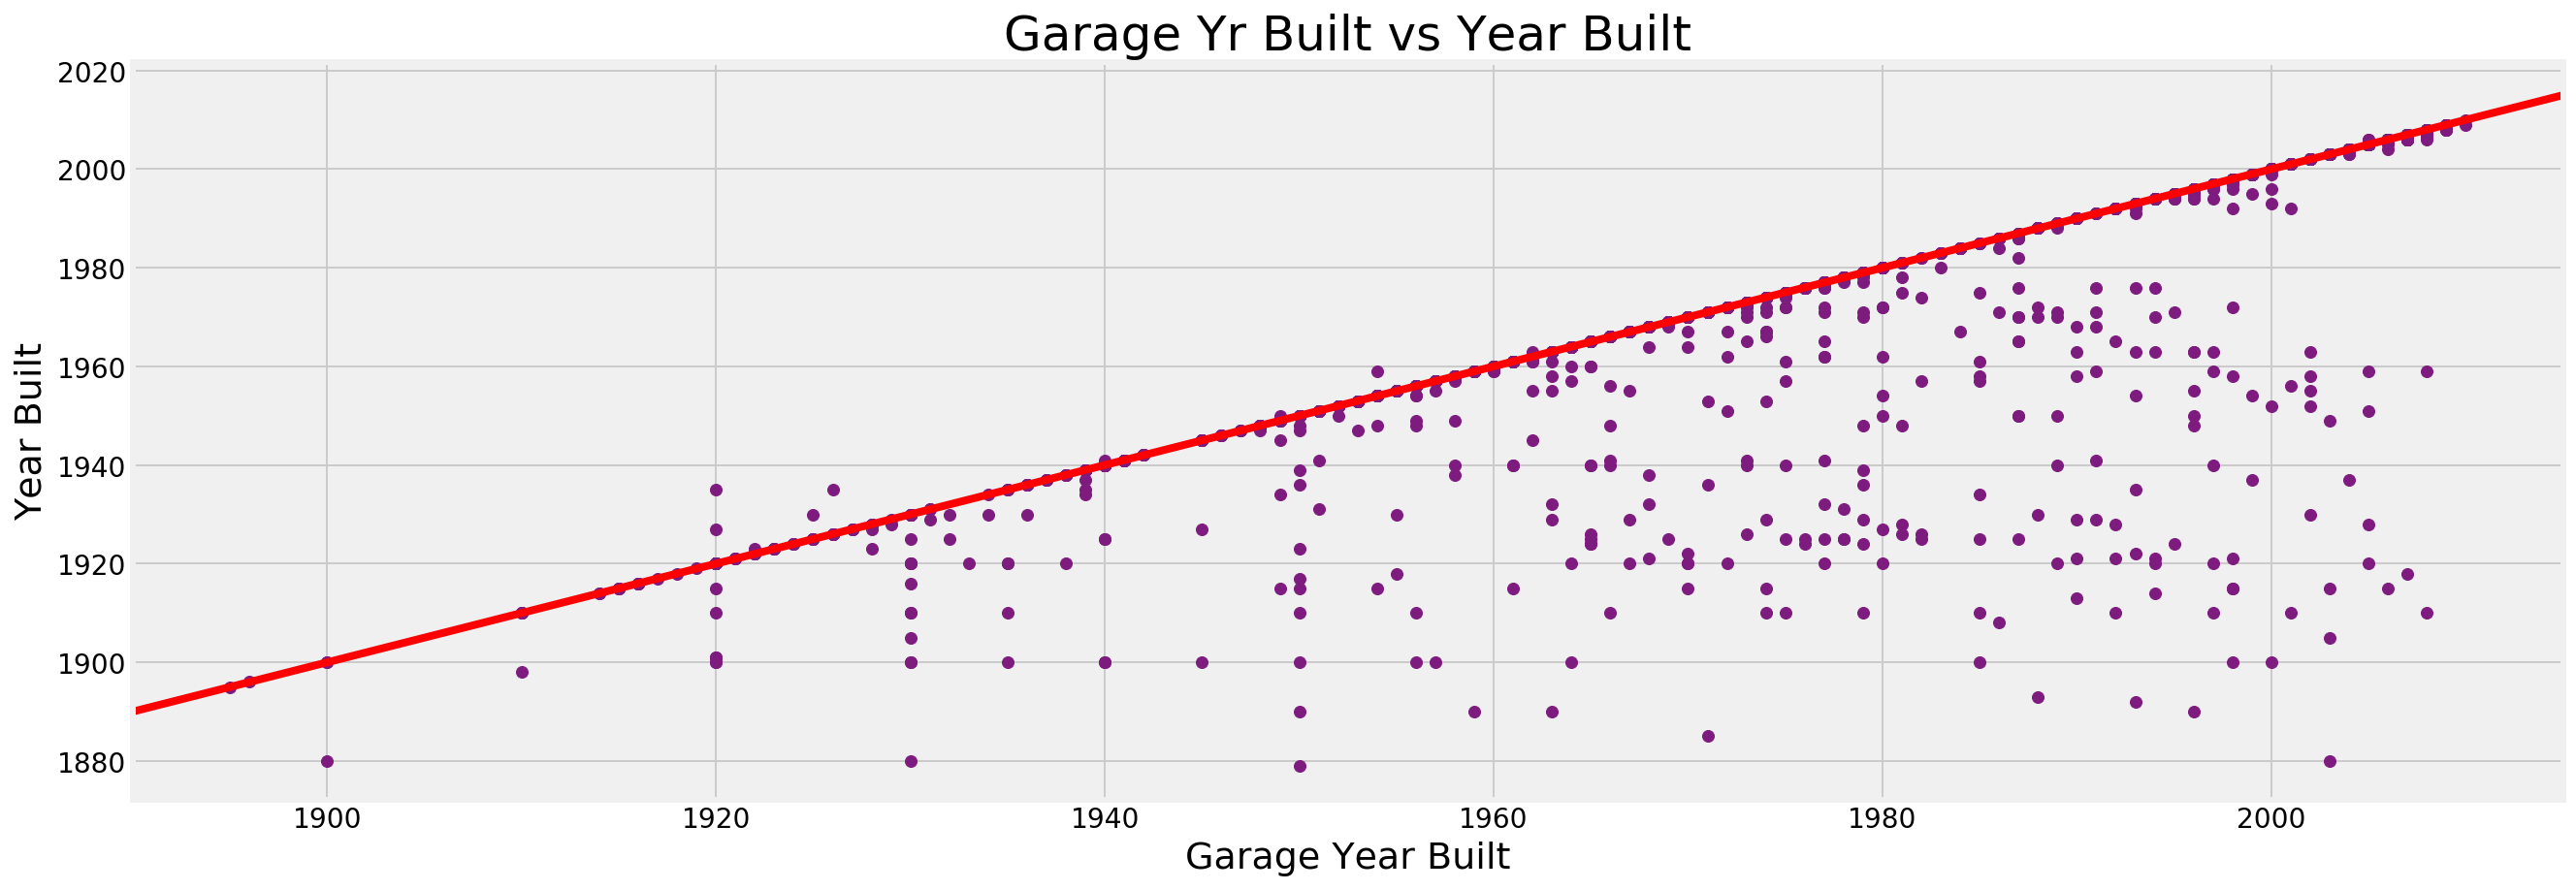

In [54]:
plt.figure(figsize=(20,7))

plt.scatter(train_df['Garage_Yr_Blt'], train_df['Year_Built'], c = DO);
plt.plot([1890,2015],[1890,2015], c='red')


plt.title('Garage Yr Built vs Year Built', fontsize = 25)
plt.ylabel('Year Built', fontsize = 19)
plt.xlabel('Garage Year Built', fontsize = 19)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(1890,2015);

In [55]:
train_df['Garage_Yr_Blt'].corr(train_df['Year_Built'])

0.8253163760422907

The scatter plot and high positive correlation (0.825) between Garage Yr Built and Year Built show strong signs of a linear relationship between the two. I will drop the Garage Yr Blt column.

In [56]:
train_df.drop('Garage_Yr_Blt',1, inplace = True)

**Removing Lot Frontage Nulls**

In [57]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911
Fence: 1651
Fireplace_Qu: 1000
Lot_Frontage: 330

There are 6 predictor variables with null values.


In [58]:
lot_columns = basement_cols = list(train_df.iloc[:,train_df.columns.str.contains('Lot')].columns)
lot_columns

['Lot_Frontage', 'Lot_Area', 'Lot_Shape', 'Lot_Config']

In [59]:
train_df[null_mask['Lot_Frontage_mask']][lot_columns].head()

,Lot_Frontage,Lot_Area,Lot_Shape,Lot_Config
0,NaN,13517,IR1,CulDSac
7,NaN,12160,IR1,Inside
8,NaN,15783,Reg,Inside
23,NaN,7980,IR1,Inside
27,NaN,11700,IR1,Inside


In [60]:
train_df[null_mask['Lot_Frontage_mask']]['Lot_Area'].describe()

count       330.000000
mean      12373.660606
std       12102.692705
min        1533.000000
25%        8127.000000
50%       10601.500000
75%       12958.250000
max      159000.000000
Name: Lot_Area, dtype: float64

Each house that has a null Lot Frontage also has a Lot Area associated with it. This means that we cannot simply replace the null values with 0 because each apartment has a lot. 

Instead, I will replace the null values with the Lot Frontage's mean value. There is only a one foot difference between the mean and median.

In [61]:
lot_frontage_mean = train_df['Lot_Frontage'].mean()
lot_frontage_median = train_df['Lot_Frontage'].median()
print(f'Lot Frontage Mean: {lot_frontage_mean}')
print(f'Lot Frontage Median: {lot_frontage_median}')

Lot Frontage Mean: 69.05520046484602
Lot Frontage Median: 68.0


In [62]:
no_lot_frontage_house = train_df[null_mask['Lot_Frontage_mask']].index

In [63]:
for house in no_lot_frontage_house:
    train_df.at[house,'Lot_Frontage'] = lot_frontage_mean

**Removing Fireplace Nulls**

In [64]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911
Fence: 1651
Fireplace_Qu: 1000

There are 5 predictor variables with null values.


In [65]:
train_df[null_mask['Fireplace_Qu_mask']][['Fireplace_Qu','Fireplaces']].head()

,Fireplace_Qu,Fireplaces
0,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
6,NaN,0


In [66]:
len(train_df[train_df['Fireplaces'] == 0]['Fireplace_Qu'])

1000

In [67]:
len(train_df[null_mask['Fireplace_Qu_mask']]['Fireplaces'])

1000

All 1000 houses that do not have fireplaces have null values as their Fireplace Quality values. As a result, all null values will be replaced by 'NA'.

In [68]:
no_fireplace_houses = train_df[null_mask['Fireplace_Qu_mask']].index

for house in no_fireplace_houses:
    train_df.at[house,'Fireplace_Qu'] = 'NA'

**Removing Fence Nulls**

In [69]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911
Fence: 1651

There are 4 predictor variables with null values.


In [70]:
train_df[null_mask['Fence_mask']].head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,60,RL,69.0552,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0000,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0000,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0000,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0000,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Houses with null values as their Fence values must not have a fence. I will replace the null values with 'NA' which stands for 'No Fence'.

In [71]:
no_fence_houses = train_df[null_mask['Fence_mask']].index

for house in no_fence_houses:
    train_df.at[house, 'Fence'] = 'NA'

**Removing Alley Nulls**

In [72]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986
Alley: 1911

There are 3 predictor variables with null values.


Houses with null values as their Alley values must not have a Alley. I will replace the null values with 'NA' which stands for 'No alley access'.

In [73]:
no_alley_houses = train_df[null_mask['Alley_mask']].index

for house in no_alley_houses:
    train_df.at[house, 'Alley'] = 'NA'

**Removing Miscellaneous Features**

In [74]:
null_mask = null_checker()

Pool_QC: 2042
Misc_Feature: 1986

There are 2 predictor variables with null values.


Houses with null values as their Misc Feature values do not have any other miscellaneous features. I will replace the null values with 'NA' which stands for 'No other misc feature'.

In [75]:
no_misc_houses = train_df[null_mask['Misc_Feature_mask']].index

for house in no_misc_houses:
    train_df.at[house, 'Misc_Feature'] = 'NA'

**Removing Pool Features**

In [76]:
null_mask = null_checker()

Pool_QC: 2042

There is 1 predictor variable with null values.


In [77]:
train_df[null_mask['Pool_QC_mask']][['Pool_QC','Pool_Area']].head()

,Pool_QC,Pool_Area
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


In [78]:
len(train_df[(null_mask['Pool_QC_mask']) & (train_df['Pool_Area'] == 0)])

2042

There are 2042 houses that both have null values as their Pool quality values and 0 square feet as their pool area values. It is safe to mark their null Pool_QC values as 'NA' which stands for 'No Pool'.

In [79]:
no_pool_houses = train_df[null_mask['Pool_QC_mask']].index

for house in no_pool_houses:
    train_df.at[house,'Pool_QC'] = 'NA'

In [80]:
null_mask = null_checker()

There are no null values in your dataset. Hooray!


In [81]:
train_df.isnull().sum().sum()#.sort_values(ascending=False)

0

I am going to check for the lowest Sale Prices. 

In [82]:
train_df[['SalePrice']].sort_values('SalePrice').head(5)

,SalePrice
1628,12789
183,13100
1309,34900
1292,35000
1518,35311


There are two houses that are around less than \\$14,000. I am going to drop them to prevent skewing in the model.

In [83]:
train_df = train_df[train_df['SalePrice'] > 14000]

For the following `max_df` dataframe, I am looking at which variables have the highest count of unique values divided by the total number of values.

In [84]:
max_list = []
name = []
for col in list(train_df.columns):
    max_value = train_df[col].value_counts().max()/len(train_df)
    max_list.append(max_value)
    name.append(col)    

In [85]:
max_df = pd.DataFrame({'Variable':name, 'Max_Value_Count' : max_list})

In [86]:
max_df.sort_values('Max_Value_Count', ascending = False).head(10)

,Variable,Max_Value_Count
8,Utilities,0.999024
4,Street,0.996584
69,Pool_Area,0.995608
70,Pool_QC,0.995608
67,3Ssn_Porch,0.987311
21,Roof_Matl,0.987311
13,Condition_2,0.987311
38,Heating,0.984383
44,Low_Qual_Fin_SF,0.983895
73,Misc_Val,0.968277


I am also going to drop the miscellaneous features because most of the values are 0. 

Now that the dataset is clean and has no nulls, I will move onto the exploratory data analysis portion and examine the the variable's distribution and correlation with the sale price.

In [87]:
train_df = train_df.drop('Misc_Val',axis=1)

In [88]:
train_df.to_csv('../datasets/train_clean.csv', index = False)

# Please go to Part 2: Exploratory Data Analysis